In [1]:
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shap import plots, Explanation
import shap
from scipy.spatial import distance
import pickle
import glob

pd.set_option('display.max_columns', None)

Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
exp_list = []

# Define the pattern to match the file names
file_pattern = '100-exp-dt/exp_k_*.pkl'

# Retrieve the list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

for file_path in file_paths:
    with open(file_path, 'rb') as handle:
        exp_list.append(pickle.load(handle))
        # Do something with the loaded data from the pickle file
        # For example, you can process or analyze 'exp' data here

In [3]:
x_features = [    
    "flow_duration", "fwd_pkts_tot", "bwd_pkts_tot",
    "fwd_data_pkts_tot", "bwd_data_pkts_tot", "fwd_pkts_per_sec", "bwd_pkts_per_sec", "flow_pkts_per_sec",
    "down_up_ratio", "fwd_header_size_tot", "fwd_header_size_min", "fwd_header_size_max",
    "bwd_header_size_tot", "bwd_header_size_min", "bwd_header_size_max", "flow_FIN_flag_count",
    "flow_SYN_flag_count", "flow_RST_flag_count", "fwd_PSH_flag_count", "bwd_PSH_flag_count", "flow_ACK_flag_count",
    "fwd_URG_flag_count", "bwd_URG_flag_count", "flow_CWR_flag_count", "flow_ECE_flag_count",
    "fwd_pkts_payload.min", "fwd_pkts_payload.max", "fwd_pkts_payload.tot", "fwd_pkts_payload.avg",
    "fwd_pkts_payload.std", "bwd_pkts_payload.min", "bwd_pkts_payload.max", "bwd_pkts_payload.tot",
    "bwd_pkts_payload.avg", "bwd_pkts_payload.std", "flow_pkts_payload.min", "flow_pkts_payload.max",
    "flow_pkts_payload.tot", "flow_pkts_payload.avg", "flow_pkts_payload.std", "fwd_iat.min",
    "fwd_iat.max", "fwd_iat.tot", "fwd_iat.avg", "fwd_iat.std", "bwd_iat.min", "bwd_iat.max",
    "bwd_iat.tot", "bwd_iat.avg", "bwd_iat.std", "flow_iat.min", "flow_iat.max", "flow_iat.tot",
    "flow_iat.avg", "flow_iat.std", "payload_bytes_per_second", "fwd_subflow_pkts", "bwd_subflow_pkts",
    "fwd_subflow_bytes", "bwd_subflow_bytes", "fwd_bulk_bytes", "bwd_bulk_bytes", "fwd_bulk_packets",
    "bwd_bulk_packets", "fwd_bulk_rate", "bwd_bulk_rate", "active.min", "active.max", "active.tot",
    "active.avg", "active.std", "idle.min", "idle.max", "idle.tot", "idle.avg", "idle.std",
    "fwd_init_window_size", "bwd_init_window_size", "fwd_last_window_size"
]

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your own array)
your_array = [4, 7, 2, 9, 5]

# Adding 3 to the index
indices = [i + 3 for i in range(len(your_array))]

# Creating a DataFrame
data = pd.DataFrame({'Value': your_array, 'Index_plus_3': indices})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='Index_plus_3', y='Value', data=data)
plt.xlabel('Index + 3')
plt.ylabel('Value')
plt.title('Array Values vs Index + 3')
plt.show()


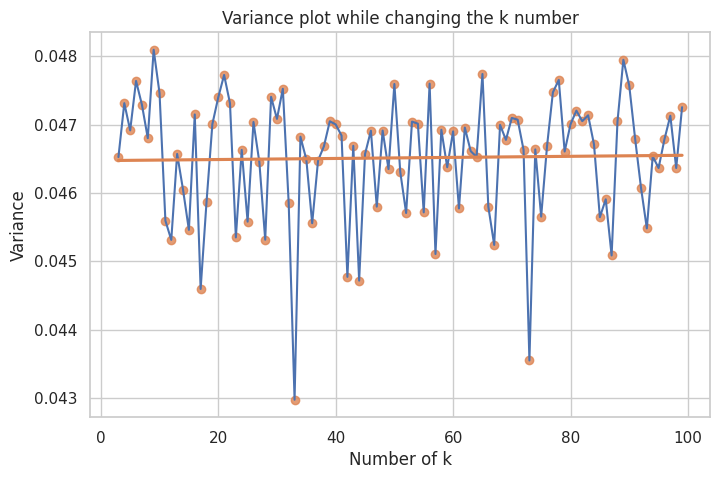

In [18]:
varianza = []
indices = [i + 3 for i in range(len(exp_list))]

for i in range(0, len(exp_list)):
    varianza.append(exp_list[i].values.std(1).mean(0))
    
data = pd.DataFrame({'Variance': varianza, 'K': indices})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x='K', y='Variance', data=data)
sns.regplot(data=data, x="K", y="Variance", ci=None) 
plt.xlabel('Number of k')
plt.ylabel('Variance')
plt.title('Variance plot while changing the k number')
plt.show()

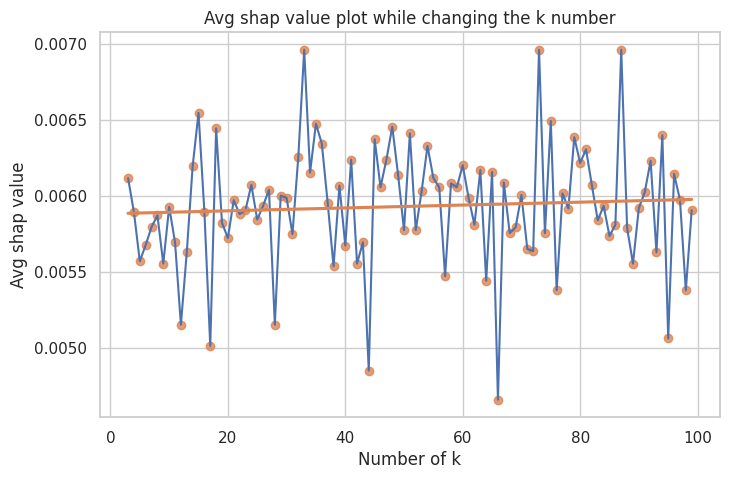

In [20]:
avg_sv = []
indices = [i + 3 for i in range(len(exp_list))]

for i in range(0, len(exp_list)):
    avg_sv.append(exp_list[i].values.mean(1).mean(0))
    
data = pd.DataFrame({'Avg_sv': avg_sv, 'K': indices})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x='K', y='Avg_sv', data=data)
sns.regplot(data=data, x="K", y="Avg_sv", ci=None) 
plt.xlabel('Number of k')
plt.ylabel('Avg shap value')
plt.title('Avg shap value plot while changing the k number')
plt.show()